# An iPython Notebook in answer to Dr. Federica's Test

**Instructions:** Each piece of instruction is contained in a cell below. 

**PREFERRED DELIVERY METHOD**
Fork this github repository on your own github, make that repository private and make fedhere a collaborator. Upload your solution to this repository. 

**OTHERWISE**
If you are not familiar with github and you cannot figure out how to follow the instructions above you can email the solution.

Fill in each cell below each piece of instruction. This is not a close-book test: feel free to use any resources (google, stackoverflow, books) that you want! 

If you cannot complete a task feel free to ask for the solution for that portion of the exercise. There are multiple aspects we will evaluate you on and it is expected that you will be  stronger on some tasks than on others. We will use this information to best fit you in our CA assignments. For example, if you cannot read in the data as we are asking, you can ask for a clean dataset so that you can show you can do the modeling part. If you are in this situation, send us an email. 

Try to write clean, readable code. This will also be a parameter of evaluation.

## Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from sklearn.base import TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

**Note:** Most people do not have seaborn installed, so you can download it from the below command.

In [2]:
from IPython.core.magic import register_line_magic

@register_line_magic
def pip(args):
    """Use pip from the current kernel"""
    from pip import main
    main(args.split())

In [3]:
%pip install seaborn

You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## ** Data Acquisition and Cleaning **

### Instructions

- Read in the data file called logreg2. 
- Call the columns x1, x2, color, and y (y should be the numerical conversion of color). 
- Convert each column to a floating point variable mapping the last column to 0s and 1s according to the value. 
- Drop poorly inputed data. At the end of the process the data should look like this:

### Expected Solution

In [65]:
datain.head()

,x1,x2,color,y
0,1.103418,5.160703,green,0.0
1,0.754804,5.846008,green,0.0
2,-1.651331,7.416112,green,0.0
3,-2.502233,7.799007,green,0.0
4,-0.183246,9.076321,green,0.0


In [66]:
datain.describe()

,x1,x2,y
count,196.000000,196.000000,196.000000
mean,3.221567,4.282077,0.448980
std,3.519541,3.409446,0.498664
min,-4.841950,-3.133742,0.000000
25%,0.617336,1.696219,0.000000
50%,3.071503,4.270623,0.000000
75%,5.738187,7.095339,1.000000
max,13.162562,12.174896,1.000000


### My Solution

In [4]:
df = pd.read_csv('logreg.csv')

df.head()

,1.10341784635,5.16070332096,green
0,0.754804,5.84600849592,green
1,-1.651331,7.41611189102,green
2,-2.502233,7.79900718173,green
3,-0.183246,9.07632085028,green
4,-1.294123,10.3247863777,green


Oops! Looks like our dataset does not have any column names. We need to make sure that we specify that we have no header when reading the data. Let us try that again!

In [5]:
df = pd.read_csv('logreg.csv', header = None)

df.head()

,0,1,2
0,1.103418,5.16070332096,green
1,0.754804,5.84600849592,green
2,-1.651331,7.41611189102,green
3,-2.502233,7.79900718173,green
4,-0.183246,9.07632085028,green


Almost there! We just need to specify names for our column.

In [6]:
df = df.rename(columns={0: 'x1', 1: 'x2', 2:'color'})

df.head()

,x1,x2,color
0,1.103418,5.16070332096,green
1,0.754804,5.84600849592,green
2,-1.651331,7.41611189102,green
3,-2.502233,7.79900718173,green
4,-0.183246,9.07632085028,green


Perfecto! Let us dive head first into the data cleaning part. Brace yourselves...

In [7]:
#Function to clean Data
def clean_data(data):
    '''
    i/p:
    data - a DataFrame
    o/p:
    cleaned_data - a DataFrame
    '''
    #Finding all those columns which are of 'object' dtype
    obj_cols = data.columns[data.dtypes.eq(object)]
    
    #Dropping color from the column as it is not numeric and should not be converted to float
    if 'color' in obj_cols:
        obj_cols = obj_cols.drop('color')
    
    #Converting to 'Float' type
    data[obj_cols] = data.loc[:,obj_cols].apply(pd.to_numeric, errors='coerce', axis=1)
    
    #Converting color from 'object' dtype to 'category' dtype
    data['color'] = data['color'].astype('category')
    
    #Creating a new column 'y' that is the numerical conversion of 'color'
    data['y'] = data['color'].cat.codes
    
    #Getting those indices (or rows) which contain NaN values
    indices_to_drop = data[pd.isnull(data).any(axis=1)].index
    
    #Dropping the indices which contain NaN
    data.drop(indices_to_drop, inplace = True)
    
    #Resetting the indices
    data.reset_index(drop = True, inplace = True)
    
    return data

In [8]:
#Passing a copy of the DataFrame so as not to manipulate the actual DataFrame
datain = clean_data(df.copy())

datain.head()

,x1,x2,color,y
0,1.103418,5.160703,green,0
1,0.754804,5.846008,green,0
2,-1.651331,7.416112,green,0
3,-2.502233,7.799007,green,0
4,-0.183246,9.076321,green,0


In [10]:
#Performance of our Function
%timeit clean_data(df.copy())

10 loops, best of 3: 33.2 ms per loop


In [11]:
datain.describe()

,x1,x2,y
count,196.000000,196.000000,196.000000
mean,3.221567,4.282077,0.448980
std,3.519541,3.409446,0.498664
min,-4.841950,-3.133742,0.000000
25%,0.617336,1.696219,0.000000
50%,3.071503,4.270623,0.000000
75%,5.738187,7.095339,1.000000
max,13.162562,12.174896,1.000000


We did it! **Challenge #1** successfully knocked out!

## ** Displaying Data **

### Instructions

- Plot the data on the x1-x2 plane using the categorical variable as color 
- Make sure that the axes labels are readable and that the axes are on the same scale 
- Use the third column as a color category

### Expected Solution

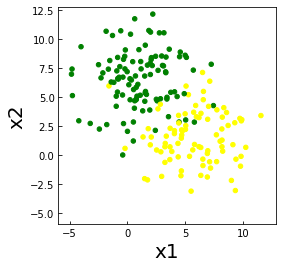

### My Solution

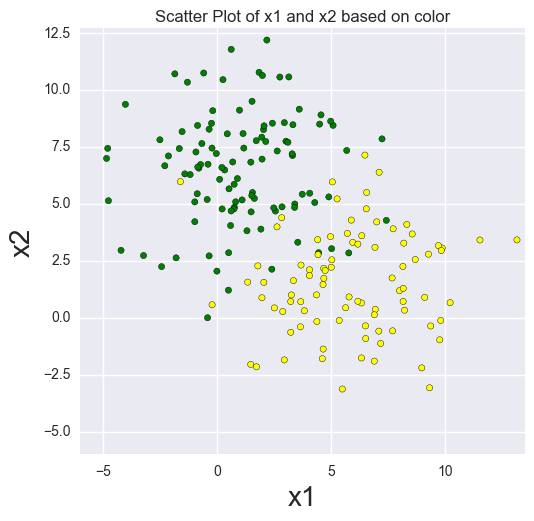

In [13]:
#Plotting the scatter plot
plt.scatter(x = datain.x1, y= datain.x2, c = datain.color)

#Setting the ticks on x and y axis
plt.xticks(np.arange(-5, 15, step=5))
plt.yticks(np.arange(-5, 15, step = 2.5))

#Setting the limits of x-axis and y-axis
plt.axis([-6, 13.5, -6, 12.7])

#Labeling the axes
plt.xlabel('x1',fontsize = 20)
plt.ylabel('x2', fontsize = 20)

#Giving a title
plt.title('Scatter Plot of x1 and x2 based on color', fontsize = 12)

#Ensuring both the axes are equal and on the same scale
plt.gca().set_aspect('equal', adjustable='box')

#Displaying the Plot
plt.show()

Based on the above scatter plot, it seems that we cannot draw a linear decision bounday that would separate all the green and yellow classes neatly. We will incur few false positives and false negatives.

**Challenge #2** successfully knocked out!

## ** Data Modeling **

### Instructions

- Now that your data is read in properly, Initiate a logistic regression object with the x1, x2, and y variables for modeling, setting C = 10,000 to disable regularization

### My Solution

Before I initiate a logistic regression object, I would like to check the class balance in the dataset. If we have a class imbalance problem, we would need to use stratification to ensure that there are equal number of classes during the training phase.

In [12]:
no_of_green_classes = len(datain.loc[(datain.color == 'green')])
no_of_yellow_classes = len(datain.loc[(datain.color == 'yellow')])
total_no_of_classes = len(datain.color)
print("Total Number of Green classes:", no_of_green_classes)
print("Total Number of Yellow classes:", no_of_yellow_classes)

print("% of Green classes:", round(no_of_green_classes/total_no_of_classes * 100, 2))
print("% of Yellow classes:", round(no_of_yellow_classes/total_no_of_classes * 100, 2))

Total Number of Green classes: 108
Total Number of Yellow classes: 88
% of Green classes: 55.1
% of Yellow classes: 44.9


Looks like we have an almost equal number of classes. Stratification is not necessary. We will just need to make sure that the training and testing data are randomly split. 

In [13]:
X = datain[['x1', 'x2']]
y = datain['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43) #43)

lr_model = LogisticRegression(C = 10000)

- Run logistic regression on the training set

### My Solution

In [14]:
lr_model.fit(X_train, y_train)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

- Print out the fitted parameters (including the intercept)

### My Solution

In [15]:
print("Fitted Parameters:", lr_model.get_params())
print("Intercept:", lr_model.intercept_)

Fitted Parameters: {'C': 10000, 'dual': False, 'multi_class': 'ovr', 'max_iter': 100, 'random_state': None, 'n_jobs': 1, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'fit_intercept': True, 'class_weight': None, 'intercept_scaling': 1, 'penalty': 'l2', 'warm_start': False}
Intercept: [ 1.0452904]


- Use these parameters to predict on the test set

### My Solution

In [16]:
predictions_1 = lr_model.predict(X_test)
predictions_1_proba = lr_model.predict_proba(X_test)[:, 1]

score_1 = lr_model.score(X_test, y_test)
print("Accuracy: ", round(score_1 * 100, 3), "%")

Accuracy:  95.918 %


We achieved an accuracy of 95.9%. Since we do not suffer from the class imbalance problem, we can take the accuracy metric a bit more seriously. Still, it is considered a good practice to see the confusion matrix, precision, and recall of any classification project.

## Cross-Validation Approach

Cross-Validation is generally used to figure out the optimal parameters of a machine learning problem. It is also useful for training, if we have less data. Let us try to run 

In [17]:
kfold = KFold(n_splits=10, random_state=43).split(X_train, y_train)
scores_2 = []
#enumerate(kfold)
for k, (train_ix, test_ix) in enumerate(kfold):

    lr_model.fit(X_train.iloc[train_ix], y_train.iloc[train_ix])
    score = lr_model.score(X_train.iloc[test_ix], y_train.iloc[test_ix])
    scores_2.append(score)
    print("Fold: {}, Class distribution {}, Accuracy: {}".format(k+1, np.bincount(y_train.iloc[train_ix]), score))
    
print("Average K-Fold Score:", np.average(scores_2))

Fold: 1, Class distribution [69 63], Accuracy: 0.8
Fold: 2, Class distribution [68 64], Accuracy: 1.0
Fold: 3, Class distribution [69 63], Accuracy: 0.8666666666666667
Fold: 4, Class distribution [67 65], Accuracy: 0.8666666666666667
Fold: 5, Class distribution [73 59], Accuracy: 0.9333333333333333
Fold: 6, Class distribution [69 63], Accuracy: 1.0
Fold: 7, Class distribution [69 63], Accuracy: 0.8666666666666667
Fold: 8, Class distribution [75 58], Accuracy: 0.9285714285714286
Fold: 9, Class distribution [72 61], Accuracy: 1.0
Fold: 10, Class distribution [71 62], Accuracy: 0.9285714285714286
Average K-Fold Score: 0.919047619048


In [18]:
scores_2_1 = cross_val_score(estimator=lr_model, X=X_train, y=y_train, cv=10)
print("CV accuracy scores: {}".format(scores_2_1))
print("Average Accuracy:", np.average(scores_2_1))

CV accuracy scores: [ 0.86666667  0.93333333  0.86666667  0.93333333  0.86666667  0.86666667
  0.93333333  1.          0.92857143  0.92307692]
Average Accuracy: 0.911831501832


## Pipelining Approach

A better way of modeling is to use Sklearn's Pipelining approach. Pipeline helps streamline a lot of routine processes, encapsulating little pieces of logic into one function call, which makes it easier to actually do modeling instead of just writing a bunch of code.It is particularly useful in large Data Science projects and helps prevent Data leakage. 

Let us start by reading the data in again. We will begin by modeling the data cleansing steps that we defined earlier.

**Note** that we will encode the target variable 'color' to numeric 0/1 before feeding it into a pipeline. We do not want to tamper with the target variable inside the pipeline as it is generally not considered a good practice to transform the target feature.

In [19]:
df_pipeline = pd.read_csv('logreg.csv', header = None)
df_pipeline = df_pipeline.rename(columns={0: 'x1', 1: 'x2', 2:'color'})

df_pipeline.color = df_pipeline.color.astype('category')

df_pipeline['y'] = df_pipeline.color.cat.codes

df_pipeline.drop('color', axis = 1, inplace = True)

df_pipeline.reset_index(drop = True, inplace = True)

df_pipeline.head()

,x1,x2,y
0,1.103418,5.16070332096,0
1,0.754804,5.84600849592,0
2,-1.651331,7.41611189102,0
3,-2.502233,7.79900718173,0
4,-0.183246,9.07632085028,0


Next, we will define a function that transforms any 'object' column to a 'float' column.

In [20]:
class ConvertToFloat(TransformerMixin):
    '''
    Converts columns of 'object' dtype to Float dtype
    Apply only to numeric columns
    '''
    def __init__(self, col_exception):
        self.col_exception = col_exception
        
    def transform(self, dataframe, *_):
        
        obj_cols = dataframe.columns[dataframe.dtypes.eq(object)]
        
        if self.col_exception in obj_cols:
            return dataframe
        else:
            
            dataframe[obj_cols] = dataframe.loc[:, obj_cols].apply(pd.to_numeric, errors='coerce', axis = 1)
        
            return dataframe
    
    def fit(self, *_):
        return self

After the conversion from object to float, some observations will become NaNs. Previously, we were removing the rows which contained these NaN observations. But a better strategy is to impute these NaN with the mean/median of the column. That way, we will ensure that we do not lose valuable information.

We will impute it with the mean as it is generally more robust than mean.

In [21]:
imputer_pipeline = Imputer(missing_values = float("NaN"), strategy='median', copy = False)

Let's go ahead and make a pipeline!

In [22]:
# from sklearn.pipeline import make_pipeline

X_pipeline = df_pipeline.drop('y', axis = 1)
y_pipeline = DataFrame(df_pipeline['y'])

X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(X_pipeline, y_pipeline, test_size=0.25, 
                                                                        random_state=43)

pipeline = make_pipeline(ConvertToFloat(col_exception = 'y'), imputer_pipeline, LogisticRegression(C = 10000))

We have successfully made a pipeline. All we need to do is do the usual .fit(), .predict()! 

In [24]:
pipeline.fit(X_train_pipe, y_train_pipe.values.ravel())
predictions_pipe = pipeline.predict(X_test_pipe)
predictions_pipe_proba = pipeline.predict_proba(X_test_pipe)[:, 1]
score_pipe = pipeline.score(X_test_pipe, y_test_pipe)

print(score_pipe)

0.94


The above was a demonstration on how we could use pipelining for modeling. It is not super useful in our case as we only have 2 features, but it makes life easier for complicated modeling approaches.

**Challenge #3** successfully knocked out!

## ** Displaying and Interpreting the Result **

- Draw two plots, first one showing your prediction, second one for the actual labels, with decision boundary in both

### My Solution

Instead of drawing two separate plots for the prediction and the actual labels, I figured it would be better if we could combine it into a single plot.

The plot will show all the actual labels and the decision boundary. Based on the decision boundary, the area in the plot will be colored based on the predicted classes.

Just FYI, A **Decision Boundary** is the set of points when the log-odds is 0, 

i.e, m_2*x_2 + m_1*x_1 + c = log (  P(C=1|X)/P(C=0|X)  )

=> m_2*x_2 + m_1*x_1 + c = 0

Plotting a **Decision Boundary** is useful in understanding what our Logistic Regression Hypothesis Function is computing. It helps us better understand when this hypothesis makes predictions that y = 1 vs. when it might make predictions that y = 0.

In [25]:
def plot_decision_boundary(X, y, model, model_name):
    h = .02
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
    y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    #Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Put the result into a color plot
    if model_name is 'Logistic':
        Z = model.predict_proba(grid)[:, 1].reshape(xx.shape)
        
    elif model_name is 'Linear':
        Z = model.predict(grid).reshape(xx.shape)
    
    f, ax = plt.subplots(figsize = (8,6))
    contour = ax.contourf(xx, yy, Z, 25, cmap="RdBu", vmin=0, vmax=1)
    
    ax_c = f.colorbar(contour)
    
    if model_name is 'Logistic':
        ax_c.set_label("$P(y = 1)$")
        ax_c.set_ticks([0, .25, .5, .75, 1])
        
    elif model_name is 'Linear':
        ax_c.set_label("$y$")
    

    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap="RdBu", vmin= -.2, vmax=1.2, edgecolor="white", linewidth=1)
    ax.set(aspect="equal", xlim=(xx.min(), xx.max()), ylim=(yy.min(), yy.max()), xlabel="$X_1$", ylabel="$X_2$")
    
    return plt.show()
    

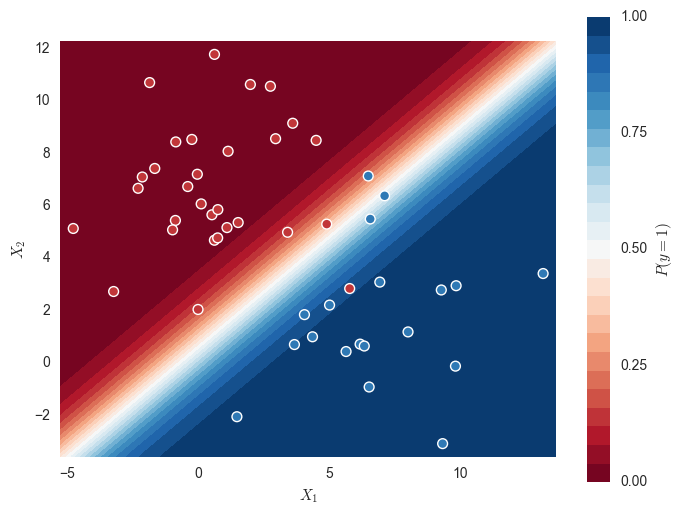

In [26]:
plot_decision_boundary(X_test, y_test, lr_model, 'Logistic')

- Calculate and display visually the confusion matrix to evaluate the model's performance, print out accuracy, recall and precision. Comment on your result

### My Solution

In [27]:
cm = metrics.confusion_matrix(y_test, predictions_1)
print("Confusion Matrix for the first Logistic Regression model")
print(cm)
cm_pipeline = metrics.confusion_matrix(y_test_pipe, predictions_pipe)
print("Confusion Matrix for the Pipeline Logistic Regression model")
print(cm_pipeline)

Confusion Matrix for the first Logistic Regression model
[[29  1]
 [ 1 18]]
Confusion Matrix for the Pipeline Logistic Regression model
[[24  2]
 [ 1 23]]


In [28]:
def plot_confusion_matrix(cm, score):
    plt.figure(figsize=(5,3))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}%'.format(round(score * 100, 3))
    plt.title(all_sample_title, size = 15)
    plt.show()

#### Confusion Matrix for First Logistic Regression Model

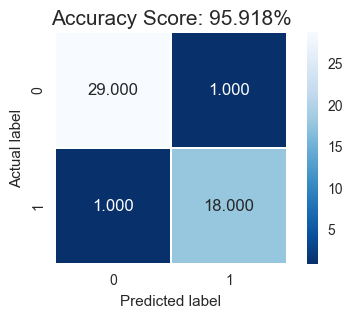

In [29]:
plot_confusion_matrix(cm, score_1)

#### Confusion Matrix for Pipeline Logistic Regression Model

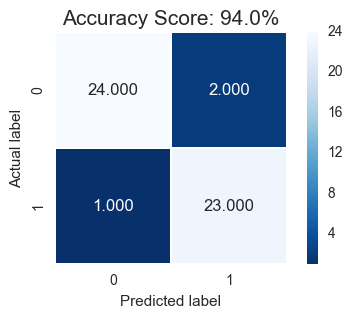

In [30]:
plot_confusion_matrix(cm_pipeline, score_pipe)

Just FYI, 

**Recall** - What % of positive/negative actual cases did I catch?

**Precision** - What % of positive/negative predictions were correct?

In [31]:
precision_1_0 = metrics.precision_score(y_test, predictions_1, pos_label=0)
precision_1_1 = metrics.precision_score(y_test, predictions_1, pos_label=1)

precision_pipe_0 = metrics.precision_score(y_test_pipe, predictions_pipe, pos_label=0)
precision_pipe_1 = metrics.precision_score(y_test_pipe, predictions_pipe, pos_label=1)

recall_1_0 = metrics.recall_score(y_test, predictions_1, pos_label=0)
recall_1_1 = metrics.recall_score(y_test, predictions_1, pos_label=1)

recall_pipe_0 = metrics.recall_score(y_test_pipe, predictions_pipe, pos_label=0)
recall_pipe_1 = metrics.recall_score(y_test_pipe, predictions_pipe, pos_label=1)

print("For First Logistic Regression Model")
print("Accuracy is {} %".format(round(score_1 * 100, 3)))
print("Precision for Class 0 is: {} %".format(round(precision_1_0 * 100, 3)))
print("Precision for Class 1 is: {} %".format(round(precision_1_1 * 100, 3)))
print("Recall for Class 0 is: {} %".format(round(recall_1_0 * 100, 3)))
print("Recall for Class 1 is: {} %".format(round(recall_1_1 * 100, 3)))
print("-------------------------------------")
print("For Pipeline Logistic Regression Model")
print("Accuracy is {} %".format(round(score_pipe * 100, 3)))
print("Precision for Class 0 is: {} %".format(round(precision_pipe_0 * 100, 3)))
print("Precision for Class 1 is: {} %".format(round(precision_pipe_1 * 100, 3)))
print("Recall for Class 0 is: {} %".format(round(recall_pipe_0 * 100, 3)))
print("Recall for Class 1 is: {} %".format(round(recall_pipe_1 * 100, 3)))

For First Logistic Regression Model
Accuracy is 95.918 %
Precision for Class 0 is: 96.667 %
Precision for Class 1 is: 94.737 %
Recall for Class 0 is: 96.667 %
Recall for Class 1 is: 94.737 %
-------------------------------------
For Pipeline Logistic Regression Model
Accuracy is 94.0 %
Precision for Class 0 is: 96.0 %
Precision for Class 1 is: 92.0 %
Recall for Class 0 is: 92.308 %
Recall for Class 1 is: 95.833 %


Another useful metric for classification is the AUC. AUC and ROC curves plot a model's TPR and FPR at different thresholds, and gives us an indication of how our classification algorithm is performing.

It can be used to compare different classification algorithms.

FYI, 
- AUC = .5 indicates random guesses. 
- AUC = 1 indicates a perfectly accurate model.
- The closer the AUC is to 1, more accurate the model is.

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
def plotAUC(truth, pred, lab):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    roc_auc = auc(fpr, tpr)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=c, label= lab+' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    return plt.show()

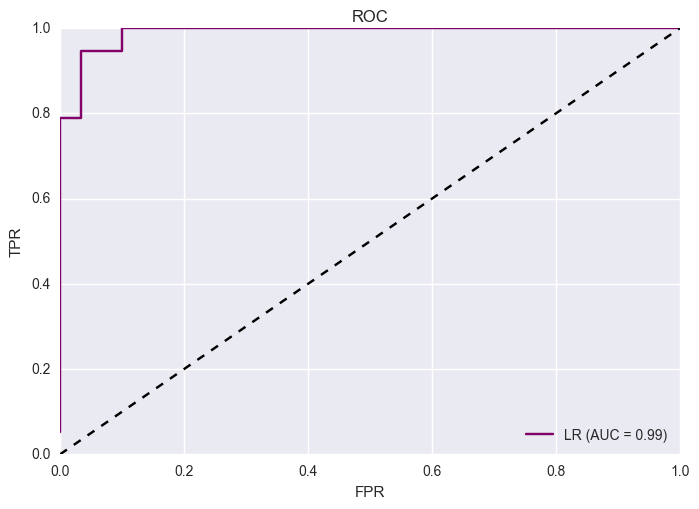

In [33]:
plotAUC(y_test, predictions_1_proba, 'LR')

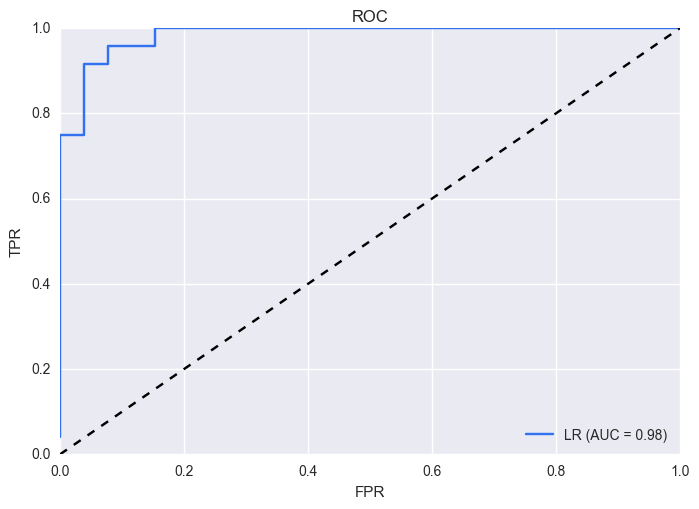

In [34]:
plotAUC(y_test_pipe, predictions_pipe_proba, 'LR')

Based on the above metrics, it seems that our classification algorithm is doing a really good job classifying the labels.

Even though with a linear decision boundary, we will never be able to able to achieve 100% accuracy on our data, our model does a good job generalizing the classification.

We might be able to achieve a 100% accuracy on our data with a non-linear decision boundary, but that model might not be able to generalize well. Anything that is 100% accurate is highly suspected to be overfitting on the data.


**Conclusion**: We can be reasonably satisfied that our Logistic Regression model will do a good job separating both the classes.

- Run a linear regression on the data and comment on which model is "best" and why.

### My Solution

Generally, it has been regarded that we should not use Linear Regression for discrate valued outputs. However, in certain cases, Linear Regression performs just as well as Logistic Regression. Let us see if that is the case here.

In [35]:
lin_r = LinearRegression()

lin_r.fit(X_train, y_train)

predictions_2_lin_r = lin_r.predict(X_test)

# scores_lin_r = 100 - mean_squared_error(y_test, predictions_2_lin_r)

# print("Accuracy of Linear Regression Model: {} %".format(round(scores_lin_r, 3)))

Let us plot a decision boundary for the Linear Regression. 

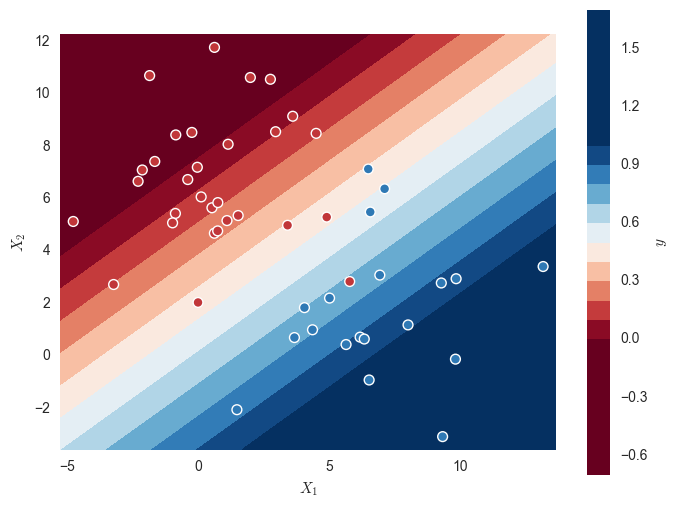

In [36]:
plot_decision_boundary(X_test, y_test, lin_r, 'Linear')

What would you know? It looks like the Linear Regression is performing just as well as Logistic Regression!

Let us look at the classification metrics of the Linear Regression.

**Note** that the above decision boundary is based on .5. For Linear Regression, it is not straight forward to use .5 as it is with Logistic Regression. In Logistic Regression, we calculate the probability of a class. If we have binary classes, it makes sense that y = 1 if h(x) > 0.5. We are basically comparing two probabilities and predicting the class with the greater probability.

In Linear Regression, that is not the case. We are directly computing the target variable. As such, we have to define a custom threshold. We will go with 0.5 as it is used in Logistic Regression for Binary classes.

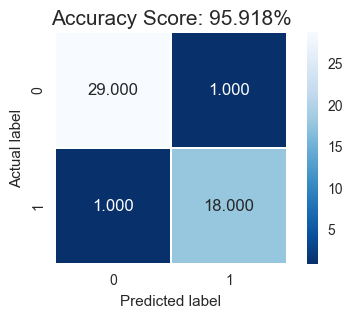

In [37]:
predictions_2_lin_r_output = [1 if i > .5 else 0 for i in list(predictions_2_lin_r)]
count = 0
for i, j in zip(predictions_2_lin_r_output, list(y_test)):
    if i == j:
        count += 1

actual_accuracy = count/len(y_test)

cm_lin_r = metrics.confusion_matrix(y_test, predictions_2_lin_r_output)
plot_confusion_matrix(cm_lin_r, actual_accuracy)

We achieve the same accuracy and the same confusion matrix as the Logistic Regression!

Let us check the Precision and Recall metrics.

In [38]:
precision_2_0 = metrics.precision_score(y_test, predictions_2_lin_r_output, pos_label=0)
precision_2_1 = metrics.precision_score(y_test, predictions_2_lin_r_output, pos_label=1)

recall_2_0 = metrics.recall_score(y_test, predictions_2_lin_r_output, pos_label=0)
recall_2_1 = metrics.recall_score(y_test, predictions_2_lin_r_output, pos_label=1)

print("For Linear Regression Model")
print("Classification Accuracy is {} %".format(round(actual_accuracy * 100, 3)))
print("Precision for Class 0 is: {} %".format(round(precision_2_0 * 100, 3)))
print("Precision for Class 1 is: {} %".format(round(precision_2_1 * 100, 3)))
print("Recall for Class 0 is: {} %".format(round(recall_2_0 * 100, 3)))
print("Recall for Class 1 is: {} %".format(round(recall_2_1 * 100, 3)))

For Linear Regression Model
Classification Accuracy is 95.918 %
Precision for Class 0 is: 96.667 %
Precision for Class 1 is: 94.737 %
Recall for Class 0 is: 96.667 %
Recall for Class 1 is: 94.737 %


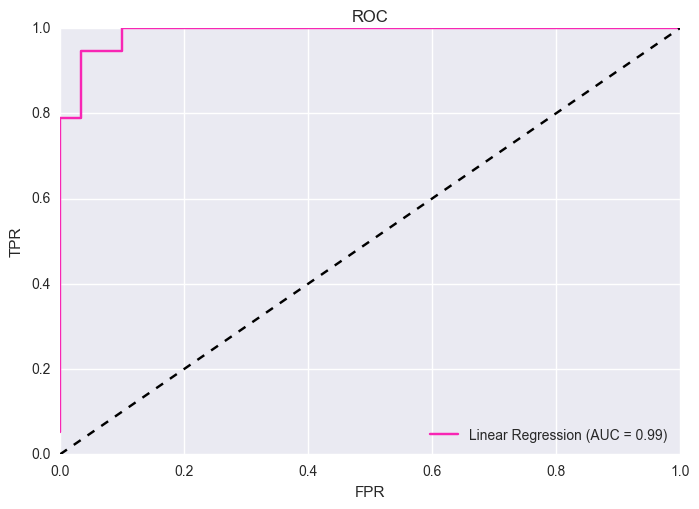

In [37]:
plotAUC(y_test, predictions_2_lin_r, 'Linear Regression')

We basically achieve the same performance as the Logistic Regression.

It seems that both Linear Regression and Logistic Regression yield the same performance for our particular dataset.

**Which "model" is the best, you ask?**

Even though it is evident that both Linear Regression and Logistic Regression will give the same performance for our dataset, I will still say that the Logistic Regression is the better model out of the two.

**Why?**

- Linear Regression assumes a continuous target variable. That assumption is automatically being invalidated when used with binary target variable.
- It also assumes the residuals to have a normal distribution and variance to be constant, which is also being invalidated.
- Linear Regression does not output between 0 and 1. It's output can become less than 0 and greater than 1. So how would you define the threshold? In Logistic Regression, it is .5 for binary classes. But it is not straightforward  with Linear Regression. 
- Linear Regression will not work if the number of classes is greater than 2. Because of the rigid nature of Linear Regression, classes can be masked by others.

Let us see what happens if I define my threshold to be: **(max - min)/2**

For Logistic Regression, it would be: (1 - 0)/2 = 0.5

Let us see what it would be for Linear Regression.

In [39]:
custom_threshold = (predictions_2_lin_r.max() - predictions_2_lin_r.min())/2

custom_threshold

0.88394758798746309

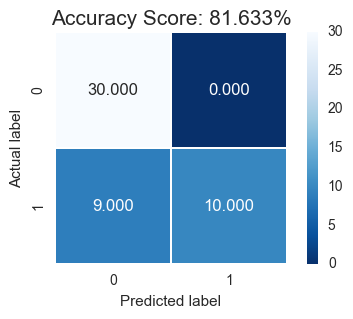

In [40]:
predictions_3_lin_r_output = [1 if i > custom_threshold else 0 for i in list(predictions_2_lin_r)]
count2 = 0
for i, j in zip(predictions_3_lin_r_output, list(y_test)):
    if i == j:
        count2 += 1

actual_accuracy_2 = count2/len(y_test)

cm_lin_r_2 = metrics.confusion_matrix(y_test, predictions_3_lin_r_output)
plot_confusion_matrix(cm_lin_r_2, actual_accuracy_2)

#print("Classification Accuracy of Linear Regression model: {} %".format(round(actual_accuracy * 100, 3)))

In [41]:
precision_3_0 = metrics.precision_score(y_test, predictions_3_lin_r_output, pos_label=0)
precision_3_1 = metrics.precision_score(y_test, predictions_3_lin_r_output, pos_label=1)

recall_3_0 = metrics.recall_score(y_test, predictions_3_lin_r_output, pos_label=0)
recall_3_1 = metrics.recall_score(y_test, predictions_3_lin_r_output, pos_label=1)

print("For Linear Regression Model")
print("Classification Accuracy is {} %".format(round(actual_accuracy_2 * 100, 3)))
print("Precision for Class 0 is: {} %".format(round(precision_3_0 * 100, 3)))
print("Precision for Class 1 is: {} %".format(round(precision_3_1 * 100, 3)))
print("Recall for Class 0 is: {} %".format(round(recall_3_0 * 100, 3)))
print("Recall for Class 1 is: {} %".format(round(recall_3_1 * 100, 3)))

For Linear Regression Model
Classification Accuracy is 81.633 %
Precision for Class 0 is: 76.923 %
Precision for Class 1 is: 100.0 %
Recall for Class 0 is: 100.0 %
Recall for Class 1 is: 52.632 %


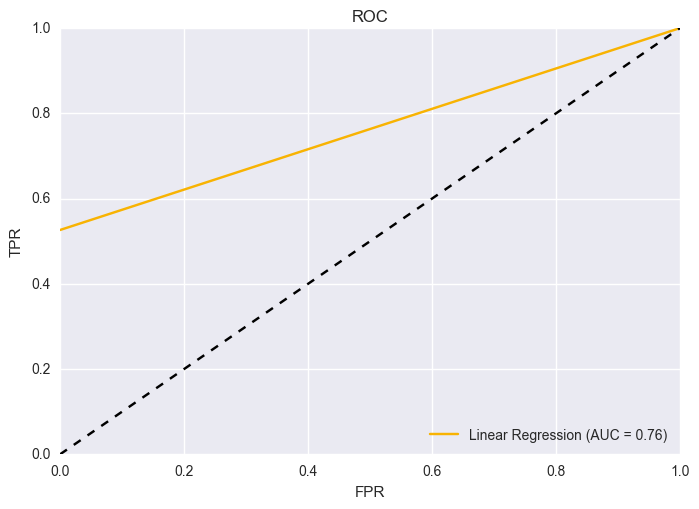

In [42]:
plotAUC(y_test, predictions_3_lin_r_output, 'Linear Regression')

As you can clearly see, the performance of Linear Regression drops when we use a custom threshold.

**Conclusion: Logistic Regression is the right tool for classification problem, not Linear Regression.**

And finally, **Challenge #4** successfully knocked out!